# Pymaceuticals

trend 1: Compared to the placebo, most of the drugs were similarly ineffective in curtailing tumor growth other than Capomullin and Ramicane.

trend 2: The error intervals are so high for the metastatic site growth that the values are not even reliable.

trend 3: Again, except for Capomullin and Ramicane, the mice all had similarly poor survival rates when compared with the placebo.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
drug = pd.read_csv("mouse_drug_data.csv")
trial = pd.read_csv("clinicaltrial_data.csv")
trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [113]:
drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [114]:
alldrugs = []
for d in drug['Drug']:
    if d not in alldrugs:
        alldrugs.append(d)

trialID = trial.set_index("Mouse ID")
drugID = drug.set_index("Mouse ID")
total = drug.merge(trial)
survive = total.groupby("Timepoint")["Mouse ID"].count()
test1 = total.loc[total["Drug"] == "Stelasyn"].groupby("Timepoint")["Tumor Volume (mm3)"].mean()
test2 = total.loc[total["Drug"] == "Capomulin"].groupby("Timepoint")["Tumor Volume (mm3)"].mean()
total.loc[total["Drug"] == "Stelasyn"].groupby("Timepoint")["Tumor Volume (mm3)"].std()
test1


Timepoint
0     45.000000
5     47.527452
10    49.463844
15    51.529409
20    54.067395
25    56.166123
30    59.826738
35    62.440699
40    65.356386
45    68.438310
Name: Tumor Volume (mm3), dtype: float64

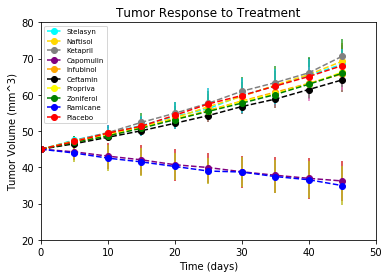

In [122]:
need_list = []
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
colors = ["red", "blue", "green", "yellow", "black", "orange", "purple", "gray", "gold", "cyan"]
for d in alldrugs:
    for c in colors:
        each = total.loc[total["Drug"] == d].groupby("Timepoint")["Tumor Volume (mm3)"]
        n, = plt.plot(x_axis, each.mean(), marker = "o", color = colors[-1], label = str(d), linestyle = "--")
        need_list.append(n)
        e = each.std()
        #print(e)
        plt.errorbar(x_axis, each.mean(), yerr=e, linestyle = "None")
        colors.pop()
        break
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm^3)")
plt.xlabel("Time (days)")
plt.legend(need_list, alldrugs, loc="upper left", prop={'size': 7})
plt.ylim(20, 80)
plt.xlim(0, x_limit)
plt.show()


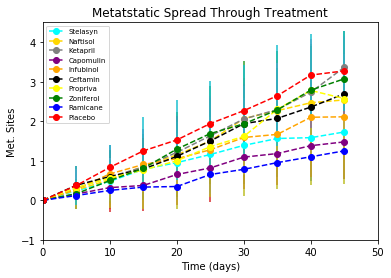

In [123]:
need_list2 = []
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
colors = ["red", "blue", "green", "yellow", "black", "orange", "purple", "gray", "gold", "cyan"]
for d in alldrugs:
    for c in colors:
        each = total.loc[total["Drug"] == d].groupby("Timepoint")["Metastatic Sites"]
        n, = plt.plot(x_axis, each.mean(), marker = "o", color = colors[-1], label = str(d), linestyle="--")
        need_list2.append(n)
        e = each.std()
        #print(e)
        plt.errorbar(x_axis, each.mean(), yerr=e, linestyle = "None")
        colors.pop()
        break
plt.title("Metatstatic Spread Through Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Time (days)")
plt.legend(need_list2, alldrugs, loc="upper left", prop={'size': 7})
plt.ylim(-1, 4.5)
plt.xlim(0, x_limit)
plt.show()

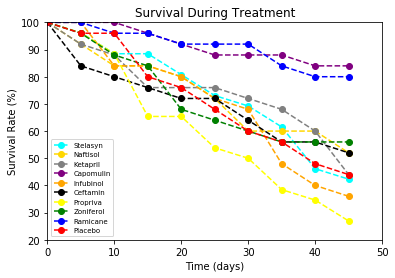

In [124]:
j
need_list3 = []
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
colors = ["red", "blue", "green", "yellow", "black", "orange", "purple", "gray", "gold", "cyan"]
for d in alldrugs:
    for c in colors:
        each = total.loc[total["Drug"] == d].groupby("Timepoint")["Mouse ID"].count()
        survival = [x/each[0]*100 for x in each]
        n, = plt.plot(x_axis, survival, marker = "o", color = colors[-1], label = str(d), linestyle="--")
        need_list3.append(n)
        colors.pop()
        break
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (days)")
plt.legend(need_list3, alldrugs, loc="lower left", prop={'size': 7})
plt.ylim(20, 100)
plt.xlim(0, x_limit)
plt.show()


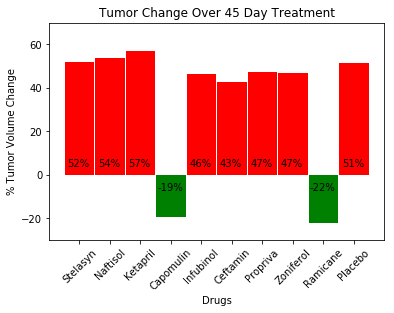

In [119]:
allpercents = []
positive = []
for d in alldrugs:
    j = total.loc[total["Drug"]==d].groupby("Timepoint")["Tumor Volume (mm3)"].mean()
    perc = (j[45]-j[0])/j[0]*100
    allpercents.append(perc)
    if perc > 0:
        positive.append(True)
    else:
        positive.append(False)
fin = pd.DataFrame({"percents": allpercents, "Boolean": positive})
x_labels = alldrugs
x_axis = np.arange(10)
j = [e for e in x_axis]
got_plot = plt.bar(x_axis, fin["percents"], width=.98,color=[x for x in fin["Boolean"].map({True: 'red', False: 'green'})])#fin["Boolean"].map({True: 'red', False: 'green'}))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_labels, rotation = 45)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.ylim(-30, 70)
a = 4
for i in fin["percents"].round(0):
    b = j[0]-.4
    if i<0:
        a = -7
        b=b-.05
    plt.text(b, a, str(int(i))+"%")
    a = 4
    b = j[0] -.4
    j.pop(0)

plt.show()

